Dataset: Marketing & sales dataset

Correlation between ad spend and sales

Compare correlation vs causal resonging

Discuss possible confounders

### 1. Generate a Sample Marketing & Sales Dataset

To demonstrate the concepts, I'll create a synthetic dataset with `ad_spend` and `sales` data. This dataset will also include `month` and `competition_level` to serve as potential confounders for later discussion.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(42)

# Generate sample data
num_entries = 100
ad_spend = np.random.rand(num_entries) * 1000  # Ad spend between 0 and 1000

# Simulate sales with a positive relationship to ad_spend, plus some noise and other factors
# Introduce some seasonality or trend indirectly to make it more realistic
seasonality_factor = np.sin(np.arange(num_entries) * 2 * np.pi / 30) * 200 + 500 # Monthly cycle
sales = 5000 + (ad_spend * 5) + (np.random.randn(num_entries) * 500) + seasonality_factor
sales = np.maximum(sales, 1000) # Ensure sales are not negative

df = pd.DataFrame({
    'ad_spend': ad_spend,
    'sales': sales,
    'month': np.tile(np.arange(1, 13), num_entries // 12 + 1)[:num_entries],
    'competition_level': np.random.choice(['low', 'medium', 'high'], num_entries)
})

print("First 5 rows of the generated dataset:")
display(df.head())

First 5 rows of the generated dataset:


,ad_spend,sales,month,competition_level
0,374.540119,7416.224128,1,medium
1,950.714306,10145.650195,2,low
2,731.993942,9287.197426,3,medium
3,598.658484,7617.065014,4,low
4,156.018640,6318.886223,5,high


### 2. Calculate Correlation between Ad Spend and Sales

Here, we'll calculate the Pearson correlation coefficient using `pandas`, which quantifies the linear relationship between 'ad_spend' and 'sales'.

### Code Part: Data Generation, Correlation Calculation, and Visualization

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(42)

# Generate sample data for ad_spend, sales, month, and competition_level
num_entries = 100
ad_spend = np.random.rand(num_entries) * 1000
seasonality_factor = np.sin(np.arange(num_entries) * 2 * np.pi / 30) * 200 + 500
sales = 5000 + (ad_spend * 5) + (np.random.randn(num_entries) * 500) + seasonality_factor
sales = np.maximum(sales, 1000)

df = pd.DataFrame({
    'ad_spend': ad_spend,
    'sales': sales,
    'month': np.tile(np.arange(1, 13), num_entries // 12 + 1)[:num_entries],
    'competition_level': np.random.choice(['low', 'medium', 'high'], num_entries)
})

print("First 5 rows of the generated dataset:")
display(df.head())

First 5 rows of the generated dataset:


,ad_spend,sales,month,competition_level
0,374.540119,7416.224128,1,medium
1,950.714306,10145.650195,2,low
2,731.993942,9287.197426,3,medium
3,598.658484,7617.065014,4,low
4,156.018640,6318.886223,5,high


In [ ]:
# Calculate Pearson Correlation between 'ad_spend' and 'sales'
correlation = df['ad_spend'].corr(df['sales'])
print(f"Pearson Correlation between Ad Spend and Sales: {correlation:.3f}")

Pearson Correlation between Ad Spend and Sales: 0.947


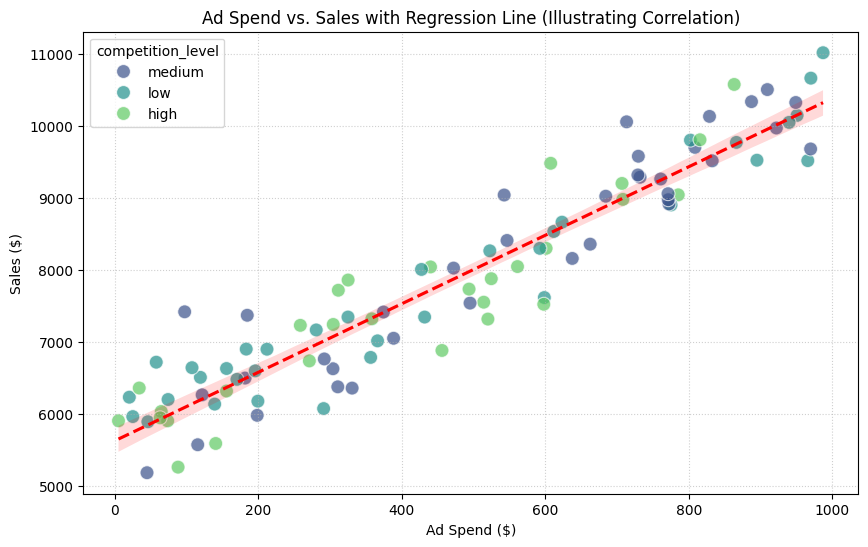

In [ ]:
# Visualize the relationship with a scatter plot and regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ad_spend', y='sales', data=df, hue='competition_level', palette='viridis', s=100, alpha=0.7)
sns.regplot(x='ad_spend', y='sales', data=df, scatter=False, color='red', line_kws={'linestyle':'--'})
plt.title('Ad Spend vs. Sales with Regression Line (Illustrating Correlation)')
plt.xlabel('Ad Spend ($)')
plt.ylabel('Sales ($)')
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

This code demonstrates the calculation and visualization of correlation. While correlation can be shown with code, establishing **causal reasoning** typically requires more complex experimental designs (like A/B testing) or advanced statistical models that go beyond simple correlation coefficients, as it aims to prove a direct cause-and-effect relationship rather than just an association.

In [ ]:
correlation = df['ad_spend'].corr(df['sales'])
print(f"Pearson Correlation between Ad Spend and Sales: {correlation:.3f}")

Pearson Correlation between Ad Spend and Sales: 0.947


### 3. Visualize Correlation

Let's visualize the relationship between 'ad_spend' and 'sales' using a scatter plot with a regression line to observe their correlation.

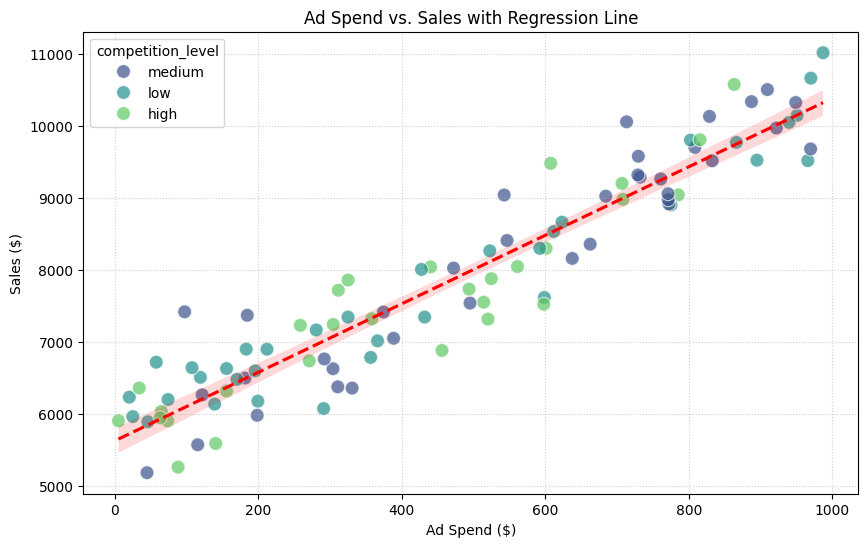

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ad_spend', y='sales', data=df, hue='competition_level', palette='viridis', s=100, alpha=0.7)
sns.regplot(x='ad_spend', y='sales', data=df, scatter=False, color='red', line_kws={'linestyle':'--'})
plt.title('Ad Spend vs. Sales with Regression Line')
plt.xlabel('Ad Spend ($)')
plt.ylabel('Sales ($)')
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

### 4. Compare Correlation vs. Causal Reasoning

While the visualization and correlation coefficient show a strong relationship, it's vital to distinguish between correlation and causation.

*   **Correlation**: Simply means two variables tend to change together. When one goes up, the other tends to go up (positive correlation) or down (negative correlation). It indicates an association, but not necessarily a cause-and-effect link.
    *   *Example*: Ice cream sales and drowning incidents are often correlated (both increase in summer), but ice cream doesn't *cause* drowning.

*   **Causation**: Implies that one event directly leads to another. A change in the cause directly produces a change in the effect.
    *   *Example*: Turning on a light switch *causes* the light to turn on (assuming a functional circuit).

**Why is this distinction important in business analytics?**

*   **Misleading Decisions**: Acting on correlation as if it were causation can lead to ineffective or even harmful business strategies (e.g., increasing ad spend based solely on correlation might not boost sales if another factor is the true driver).
*   **Identifying True Levers**: To effectively optimize marketing budgets, it's crucial to understand if ad spend genuinely *causes* an increase in sales, or if other factors are at play.

To establish causation, more rigorous methods like A/B testing (randomized controlled trials), natural experiments, or advanced causal inference techniques are often required, rather than just observational data and correlation.

### 5. Discuss Possible Confounders

Confounders are variables that can influence both the 'ad_spend' and 'sales', potentially creating an apparent (spurious) correlation or obscuring a true causal relationship. When analyzing marketing and sales data, several factors commonly act as confounders:


*  